In [20]:
import numpy as np 
import matplotlib.pyplot as plt

from astropy.constants import mu0

import astropy.units as u

# increase the font size
plt.rcParams.update({'font.size': 12})

[ 0.34906585  0.34804162  0.34497495  0.33988382  0.33279812  0.32375943
  0.31282079  0.3000464   0.28551121  0.26930053  0.25150948  0.23224248
  0.21161259  0.18974087  0.16675567  0.14279189  0.11799015  0.09249599
  0.06645903  0.04003207  0.01337018 -0.01337018 -0.04003207 -0.06645903
 -0.09249599 -0.11799015 -0.14279189 -0.16675567 -0.18974087 -0.21161259
 -0.23224248 -0.25150948 -0.26930053 -0.28551121 -0.3000464  -0.31282079
 -0.32375943 -0.33279812 -0.33988382 -0.34497495 -0.34804162 -0.34906585
 -0.34906585 -0.34804162 -0.34497495 -0.33988382 -0.33279812 -0.32375943
 -0.31282079 -0.3000464  -0.28551121 -0.26930053 -0.25150948 -0.23224248
 -0.21161259 -0.18974087 -0.16675567 -0.14279189 -0.11799015 -0.09249599
 -0.06645903 -0.04003207 -0.01337018  0.01337018  0.04003207  0.06645903
  0.09249599  0.11799015  0.14279189  0.16675567  0.18974087  0.21161259
  0.23224248  0.25150948  0.26930053  0.28551121  0.3000464   0.31282079
  0.32375943  0.33279812  0.33988382  0.34497495  0

(-15.0, 15.0)

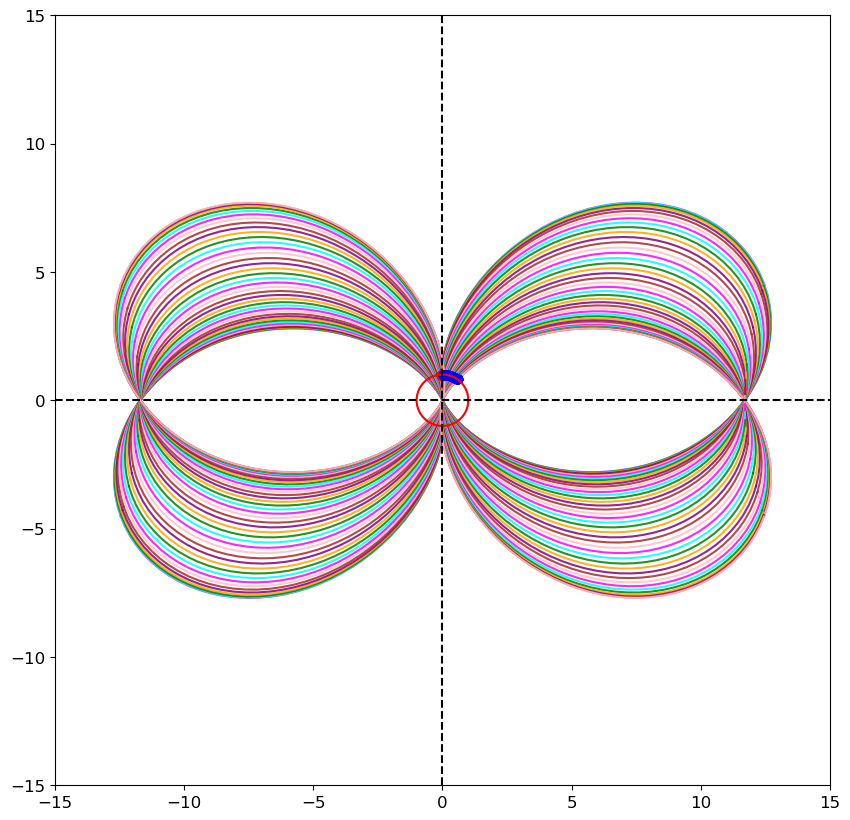

In [43]:
B0 = 1000 * u.G 

Rs = 1.2 * u.R_sun
M = B0 / Rs**3




aplanet = 11.7 # semi-major axis

# plot a dipole field line from the big circle
theta = np.linspace(-np.pi/2, np.pi/2, 100)

# now rotate the field by alpha degrees in the x-y plane
alphamax = 20 * np.pi/180
phi = np.linspace(0., 0.5, 42)
alphas = (alphamax * np.cos(phi * 2 * np.pi))

reqs =np.array ([aplanet / (np.cos(a)**2) for a in alphas])


r = [req * np.sin(theta)**2 for req in reqs]
# convert to cartesian coordinates
x = r * np.sin(theta)
y = r * np.cos(theta)



xs = [x*np.cos(alpha) - y*np.sin(alpha) for alpha, x, y in zip(alphas, x, y)]
ys = [x*np.sin(alpha) + y*np.cos(alpha) for alpha, x, y in zip(alphas, x, y)]
ain = np.pi
x2 = [-x for x in xs]
y2 = [-y for y in ys]


# calc the latitude at rstar
rstar = 1
lat = np.concatenate([np.arcsin(np.sqrt(rstar / reqs)), np.arcsin(np.sqrt(rstar/reqs))])
nreqs = np.concatenate([reqs, reqs])

xstar = nreqs * np.sin(lat) * np.sin(lat)**2
ystar = nreqs * np.cos(lat) * np.sin(lat)**2


# rotate the xstar, ystar by alpha
nalphas = np.concatenate([alphas, -alphas])
xstars = np.array([x_*np.cos(alpha) - y_*np.sin(alpha) for alpha, x_, y_ in list(zip(nalphas, xstar, ystar))])
ystars = np.array([x_*np.sin(alpha) + y_*np.cos(alpha) for alpha, x_, y_ in list(zip(nalphas, xstar, ystar))])


surfacelats = np.arctan(np.array(ystars)/np.array(xstars)) * 180 / np.pi

fig, ax1 = plt.subplots(1, 1, figsize=(10,10))

mask = nalphas > lat
print(nalphas, lat)

# plot the star
ax1.plot(xstars[mask], ystars[mask], 'o', color='red')
ax1.plot(xstars[~mask], ystars[~mask], 'o', color='blue')


# plot a circle at the star with radius rstar
xc, yc = np.cos(np.linspace(0, 2*np.pi, 100)), np.sin(np.linspace(0, 2*np.pi, 100))
ax1.plot(rstar * xc, rstar * yc, color='red')

  # plot the dipole 
alpha = 0.8
colors = ["magenta", "cyan", "green", "orange", "purple", "brown", "pink"]*6
for i, (x,y) in enumerate(zip(xs,ys)):
    ax1.plot(x, y,  zorder=-10, alpha=alpha + 0.05, color=colors[i])
    alpha += 0.0
alpha = 0.8
for i, (x,y) in enumerate(zip(x2,y2)):
    ax1.plot(x, y, zorder=-10, alpha=alpha + 0.05, color=colors[i])
    alpha += 0.0
# ax1.plot(x, y, color='olive', zorder=-10, linestyle='--')
# ax1.plot(x2, y2, color='olive', zorder=-10, linestyle='--')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
extent = 15
plt.xlim(-extent,extent)
plt.ylim(-extent,extent)

(0.0, 1.0)

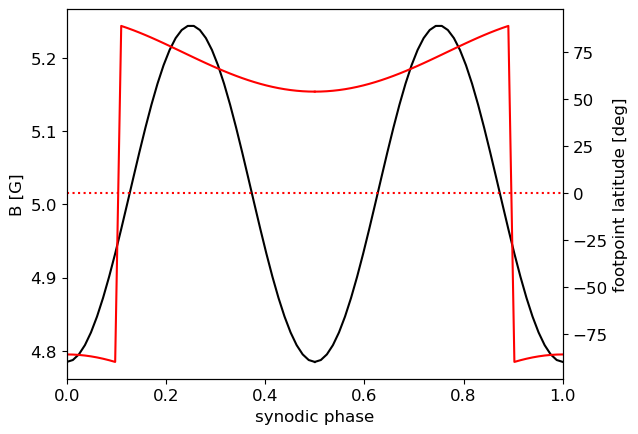

In [44]:
B_0 = 2100
B = B_0 * (rstar / aplanet)**3 * (1 + 3*np.cos(alphas)**2)
plt.figure()
plt.plot(phi, B  , label='B [G]', c="k")
plt.plot(phi+0.5, B  , c="k")
plt.ylabel('B [G]')
plt.xlabel("synodic phase")
# add a dual axis
ax2 = plt.gca().twinx()
ax2.plot(phi, surfacelats[:42] , label='footpoint latitude [deg]', c='red')
ax2.plot(phi+0.5, surfacelats[42:],  c='red')
ax2.axhline(0, color='red', linestyle=':')
ax2.set_ylabel('footpoint latitude [deg]')

# repeat with phi +0.5



plt.xlim(0,1)



In [45]:
prot, porb = 1.415, 6.9594
prot = porb / 5
psyn = 1 / (1/prot - 1/porb)
psyn / porb

0.25

In [47]:
6.9594 / 5

1.39188

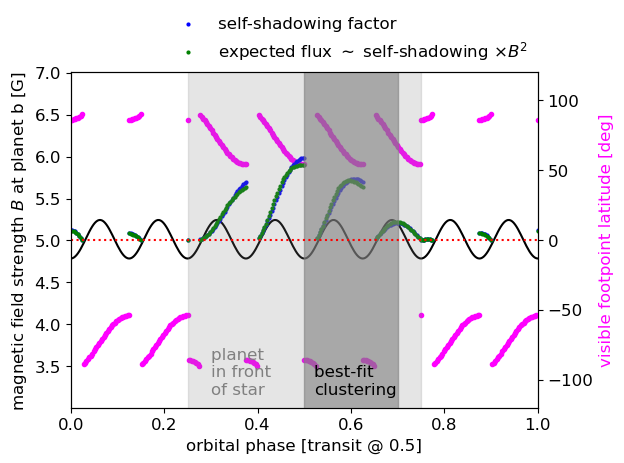

In [51]:
# make 10 repeats of B and surfacelats[:21] 
B10 = np.concatenate([B]*10)
surfacelats10 = np.concatenate([surfacelats[:42]]*10)

phi10 = np.concatenate([phi + 0.5*i for i in range(10)]) * psyn / porb

phimask = (phi10>0.25) & (phi10<0.75)

foreshortening = np.abs(np.cos((phi10-0.5) * 2 * np.pi) * np.cos(surfacelats10/180 * np.pi))

plt.figure()
plt.plot(phi10, B10 , c="k")
plt.ylabel('magnetic field strength $B$ at planet b [G]')
plt.xlabel("orbital phase [transit @ 0.5]")
plt.ylim(np.mean(B10) - 2, np.mean(B10) + 2)
# add a dual axis
ax2 = plt.gca().twinx()
surfacelats10[~phimask] = -surfacelats10[~phimask]

mask_lower_hem = surfacelats10 > 0

ax2.scatter(phi10, surfacelats10  , c='magenta', marker=".")
ax2.scatter(phi10[mask_lower_hem], foreshortening[mask_lower_hem] * 1e2  , 
           c='blue', label='self-shadowing factor' , s=4)

ax2.scatter(phi10[mask_lower_hem], foreshortening[mask_lower_hem] * B10[mask_lower_hem]**2 * 4, 
           c='green',  label=r'expected flux $\sim$ self-shadowing $\times B^2$', s=4)

plt.text(0.52, 0.04, 'best-fit \nclustering', color='k', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.3, 0.04, 'planet \nin front\nof star', color='grey', fontsize=12, transform=plt.gca().transAxes)
plt.legend(loc=(0.2,1.01), frameon=False, fontsize=12)
# shade the region between 0.5 and 0.7
plt.fill_between([0.5, 0.7], -190, 190, color='gray', alpha=0.6)
plt.fill_between([0.25, 0.75], -190, 190, color='gray', alpha=0.2)
plt.ylim(-120,120)


# plt.text(-0.1, 1.1, fr'mag. obl.={alphamax*180/np.pi:.0f}$^\circ$', transform=plt.gca().transAxes, fontsize=13)
ax2.axhline(0, color='red', linestyle=':')
ax2.set_ylabel('visible footpoint latitude [deg]', color='magenta')
plt.xlim(0,1)

plt.tight_layout()
plt.savefig('../plots/paper/toy_model.png', dpi=300)